# Importing the Libraries

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import random
from termcolor import colored

# Making Predictions

In [2]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [3]:
def forward(x):
    y = w * x + b
    return y

In [4]:
x = torch.tensor(2)
print(forward(x))

tensor(7., grad_fn=<AddBackward0>)


In [5]:
x = torch.tensor([[4], [7]])
print(forward(x))

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)


# Linear Class

In [6]:
torch.manual_seed(1)
model = nn.Linear(in_features=1, out_features=1)
print(model.weight, model.bias)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [7]:
x = torch.tensor([2.0])
print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


In [8]:
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)


# Custom Modules

In [9]:
class LR(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [10]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [11]:
print(model.parameters())

<generator object Module.parameters at 0x11f756900>


In [12]:
x = torch.tensor([1.0])
print(model.forward(x))

tensor([0.0739], grad_fn=<AddBackward0>)


In [13]:
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)


# Creating Dataset

In [14]:
X = torch.randn(10, 1)
print(X)

tensor([[ 0.1163],
        [ 0.7213],
        [ 0.5636],
        [ 1.1431],
        [ 0.8590],
        [ 0.7056],
        [-0.3406],
        [-1.2720],
        [-1.1948],
        [ 0.0250]])


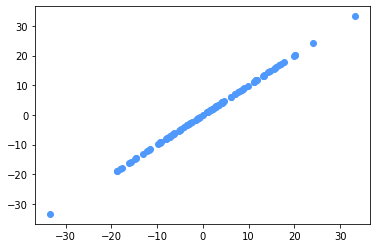

In [15]:
X = torch.randn(100, 1) * 10
y = X
plt.plot(X.numpy(), y.numpy(), 'o', c=np.random.rand(3))

Text(0.5, 0, 'x')

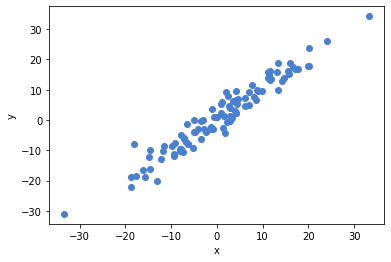

In [16]:
y = X + 3 * torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o', c=np.random.rand(3))
plt.ylabel('y')
plt.xlabel('x')

In [17]:
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [18]:
[w, b] = model.parameters()
print([w, b])

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [19]:
w1 = w[0][0]
b1 = b[0]
print(w1, b1)

tensor(0.5153, grad_fn=<SelectBackward0>) tensor(-0.4414, grad_fn=<SelectBackward0>)


In [20]:
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

0.5152631998062134 -0.44137823581695557


In [21]:
def get_params():
    return (w[0][0].item(), b[0].item())

In [22]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y, color=np.random.rand(3))
    plt.show()

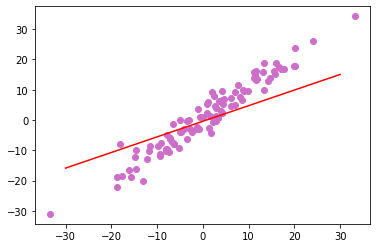

In [23]:
plot_fit("Initial Model")

# Training - Code Implementation

In [24]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [25]:
print(criterion)

MSELoss()


In [26]:
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [38]:
epochs = 100
losses = []
termcolors = [
    "grey", "red", "green", "yellow", "blue", "magenta", "cyan", "white"
]
font_colors = random.choices(termcolors, k=2)
for i in range(epochs):
    i += 1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    if i == 1 or i % 10 == 0:
        print(colored("epoch:", font_colors[0], attrs=['bold']), i,
              colored("loss:", font_colors[1]), loss.item())
        print(colored("weight:", font_colors[1]),
              list(model.parameters())[0][0][0].item(),
              colored("bias:", font_colors[1]),
              list(model.parameters())[1][0].item())
    else:
        continue
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 1 loss: 9.29307746887207
weight: 1.0040624141693115 bias: -0.4163966774940491
epoch: 10 loss: 9.264630317687988
weight: 1.0093979835510254 bias: -0.4145067036151886
epoch: 20 loss: 9.247184753417969
weight: 1.0133920907974243 bias: -0.41263270378112793
epoch: 30 loss: 9.235923767089844
weight: 1.0163809061050415 bias: -0.41077154874801636
epoch: 40 loss: 9.228140830993652
weight: 1.0186165571212769 bias: -0.40892094373703003
epoch: 50 loss: 9.22231674194336
weight: 1.0202876329421997 bias: -0.40707916021347046
epoch: 60 loss: 9.217597961425781
weight: 1.0215357542037964 bias: -0.4052448570728302
epoch: 70 loss: 9.213504791259766
weight: 1.0224668979644775 bias: -0.40341708064079285
epoch: 80 loss: 9.209771156311035
weight: 1.023160457611084 bias: -0.4015950858592987
epoch: 90 loss: 9.206242561340332
weight: 1.0236760377883911 bias: -0.3997783064842224
epoch: 100 loss: 9.202836990356445
weight: 1.0240583419799805 bias: -0.3979663550853729


In [46]:
for i in range(100):
    termcolors = [
        "grey", "red", "green", "yellow", "blue", "magenta", "cyan", "white"
    ]
    colors = random.choices(termcolors, k=2)
    print(colors)

['red', 'grey']
['cyan', 'white']
['magenta', 'yellow']
['magenta', 'grey']
['yellow', 'magenta']
['yellow', 'white']
['white', 'yellow']
['yellow', 'magenta']
['cyan', 'blue']
['grey', 'red']
['grey', 'red']
['magenta', 'blue']
['red', 'grey']
['red', 'white']
['magenta', 'yellow']
['green', 'green']
['grey', 'white']
['grey', 'red']
['cyan', 'magenta']
['yellow', 'green']
['green', 'cyan']
['grey', 'cyan']
['green', 'green']
['cyan', 'yellow']
['yellow', 'blue']
['grey', 'yellow']
['red', 'magenta']
['white', 'yellow']
['blue', 'red']
['red', 'yellow']
['green', 'cyan']
['yellow', 'cyan']
['green', 'blue']
['grey', 'red']
['white', 'white']
['grey', 'red']
['blue', 'white']
['white', 'green']
['grey', 'cyan']
['blue', 'white']
['magenta', 'yellow']
['grey', 'green']
['yellow', 'red']
['yellow', 'red']
['white', 'white']
['white', 'white']
['red', 'white']
['magenta', 'red']
['magenta', 'cyan']
['blue', 'white']
['white', 'grey']
['magenta', 'red']
['cyan', 'yellow']
['cyan', 'white']

In [43]:
colors

['grey', 'white']